<a href="https://colab.research.google.com/github/Blue-BigData/pandas-practice/blob/main/230130_SNA_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis with Twitter
- Kpop 키워드 검색량 분석해보기 : NewJeans

## 실습 환경 세팅하기


### Google Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Twitter 개발자 계정 연결

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-so8svzxm
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-so8svzxm
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.6 MB/s eta 0:00:00
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=102442 sha256=4a2f5d291da0fe68800fb1462f216e5982fc336155125b73b63255150fecf8e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-socnc7n5/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uni

In [ ]:
import tweepy     # 트위터 데이터 스크래핑 라이브러리

In [ ]:
# 트위터 앱의 Keys and Access Tokens를 참조하여 자신의 설정값 입력
api_key = ''
api_secret_key = ''

In [ ]:
# 인증요청 1 : 개인 앱 정보
auth = tweepy.OAuthHandler(api_key, api_secret_key)
access_token = ''
access_token_secret = ''

# 인증요청 2 : access 토큰 요청(인증 요청 참조변수 이용)
auth.set_access_token(access_token, access_token_secret)

# 인증요청 3 : twitter API 생성
api = tweepy.API(auth)

## Data Scraping

### 트위터 Data Scraping

In [ ]:
# 검색할 키워드, 날짜, 개수
keyword = 'newjeans'
until = '2023-01-25'
items = 300

search = []
for status in tweepy.Cursor(api.search_tweets, q = keyword, until = until).items(items):
  search.append(status.text)

print(len(search))    # 결과물 길이 
print(search[0])      # 첫번째 text 보기 

300
RT @BLACKPINKSTATS5: Girl groups with most songs charted on Spotify Global Daily Chart Top 50 history: 

#1 @BLACKPINK - 20
#2 Fifth Harmon…


In [64]:
data = {}      # 전체 결과물 추가
i = 0          # 트윗의 번호 부여
for tweet in search :
  data['text'] = search[i]       # text 키에 text 문서를 저장한다
  # print(i, " : ", data)
  i += 1

# print(data)

### 데이터를 텍스트 파일로 저장

In [66]:
# tweet_data_newjeans.txt
import os

wfile = open("/gdrive/My Drive/tweet_data_newjeans.txt", mode = 'w')       # 쓰기 모드로 접근
data = {}
i = 0

for tweet in search :
  data['text'] = search[i]
  wfile.write(search[i] + '\n')      # 파일 출력
  i += 1

wfile.close()

In [67]:
# scraping data 내용이 저장 되었는지 확인
file = open("/gdrive/My Drive/tweet_data_newjeans.txt", 'r')

uncleaned_text = file.readlines()
file.close()

# print(uncleaned_text)

## 데이터 전처리

In [ ]:
# 전처리, 그래프, 시각화 라이브러리
import re
import networkx as nx
import matplotlib.pyplot as plt

In [68]:
# 분석에 필요없는 부분 삭제 함수
def clean_data(readData) :
  text = re.sub('\n', '', readData)
  text = re.sub('RT', '', text)
  text = re.sub('h\w{4}://\w\W.{13}', '', text)
  text = re.sub('&amp;', '', text)
  text = re.sub('@\w{2,15}', '', text)
  text = re.sub('^https', '', text)
  text = re.sub("[_《》….()!,'?&;*“”‘’=+-/#%]",'', text)
  text = re.sub('"','', text)
  text = re.sub('[0-9:]', '', text)
    
  text = text.lower()           # 영어라서 소문자로 바꿔준다
    
  return text

In [69]:
# 이모티콘 제거 함수
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def remove_emoji(readData):
    text = re.sub(emoji_pattern, '', readData)
    return text

In [71]:
# 데이터 정제하기
cleaned_text = []

for i in range(len(uncleaned_text)):
  first_cleaned_text = clean_data(uncleaned_text[i])
  second_cleaned_text = remove_emoji(first_cleaned_text)
  cleaned_text.append(second_cleaned_text)

# print(cleaned_text)

### 데이터 토큰화

In [72]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [73]:
# 토큰화
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag      # 품사 판별
from nltk.corpus import stopwords

In [74]:
all_nouns = []

for t in range(len(cleaned_text)):
  x = word_tokenize(cleaned_text[t])       # 토큰화
  words = pos_tag(x)                       # 품사 태깅
  nouns = ""
  for word, pos in words :
    if pos in ['NN', 'NNP', 'NNS']:        # 명사, 고유명사, 명사 복수형
      param = word
      nouns = nouns + param + ' '
    all_nouns.append(nouns)

  # print(all_nouns)

### 중복 단어, 동시 출연 빈도

In [75]:
# 한 트윗 내 중복 단어 점검
file = open('dummy.txt', 'w')
for article in all_nouns:
  article = list(set(article.split()))    # 단어별로 분리한 것을 set에 넣어 중복 제거, 다시 list로 변경
  # print(article)
  for i in range(len(article)):
    file.write(article[i] + ' ')
  file.write('\n')

file.close()

In [76]:
# 단어의 동시 출연 빈도
count = {}

for article in open('dummy.txt'):
  article = list(set(article.split())) 
  for i, a in enumerate(article):             # 인덱스(i)와 원소(a)를 동시에 접근하면서 반복문 돌기
    for b in article[i:]:
      if a==b: 
        continue                 # 같은 단어의 경우는 세지 않으므로 그냥 지나간다
      if a>b: 
        a,b = b,a                # A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
        count[a, b] = count.get((a,b),0)+1   
        b,a = a,b
      elif a<b:
        count[a, b] = count.get((a,b),0)+1  
# print(count)

## 엣지 리스트 그래프

In [77]:
# 엣지 리스트를 그리기 위한 사전 작업
min_num = 30             # 동시 출현 빈도 카운팅 현황에 맞게 조절할 변수

file = open('edge_list.txt', 'w')
for key, value in count.items() :
  if value >= min_num :
    # print(key, value)
    string = str(key).strip("()")
    string = string.replace("'", "")
    string = string.replace(",","")
    newstr = string + '\n'
    file.write(newstr)

file.close()

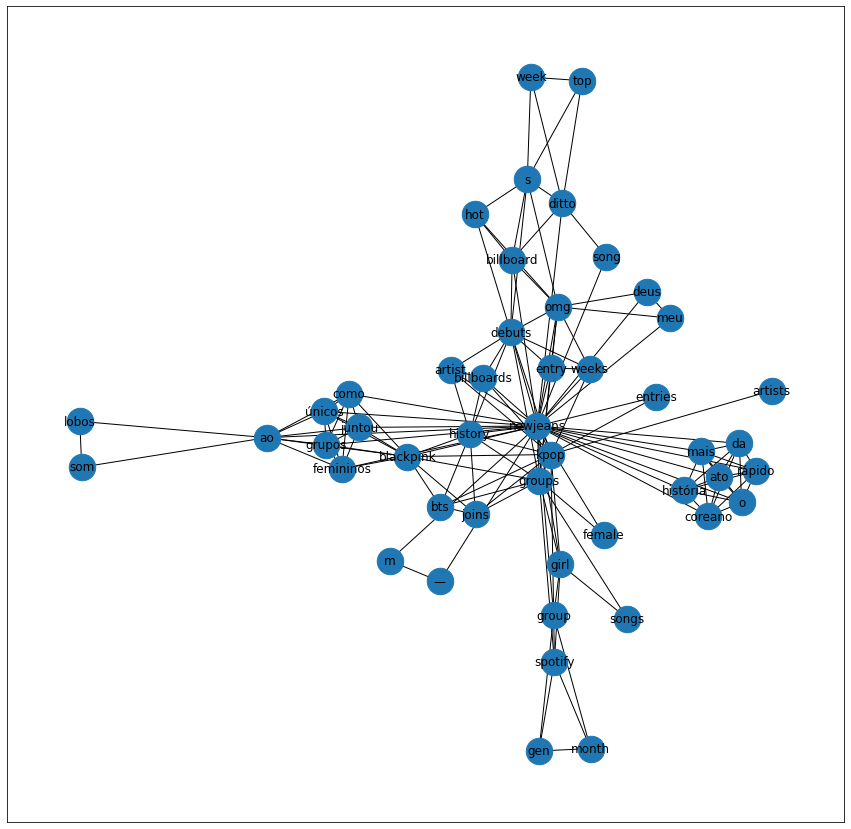

In [78]:
# 텍스트 파일을 읽고, 엣지 리스트 그래프 그리기
G = nx.read_edgelist("edge_list.txt", create_using = nx.Graph())
G.remove_nodes_from(['brand','reputation','ๆ', 'ของสาว'])

plt.figure(figsize = (15, 15))
nx.draw_networkx(G, node_size = 700)

(-1.177932622108585,
 1.2069528735940285,
 -1.1003106308122284,
 1.117277741850468)

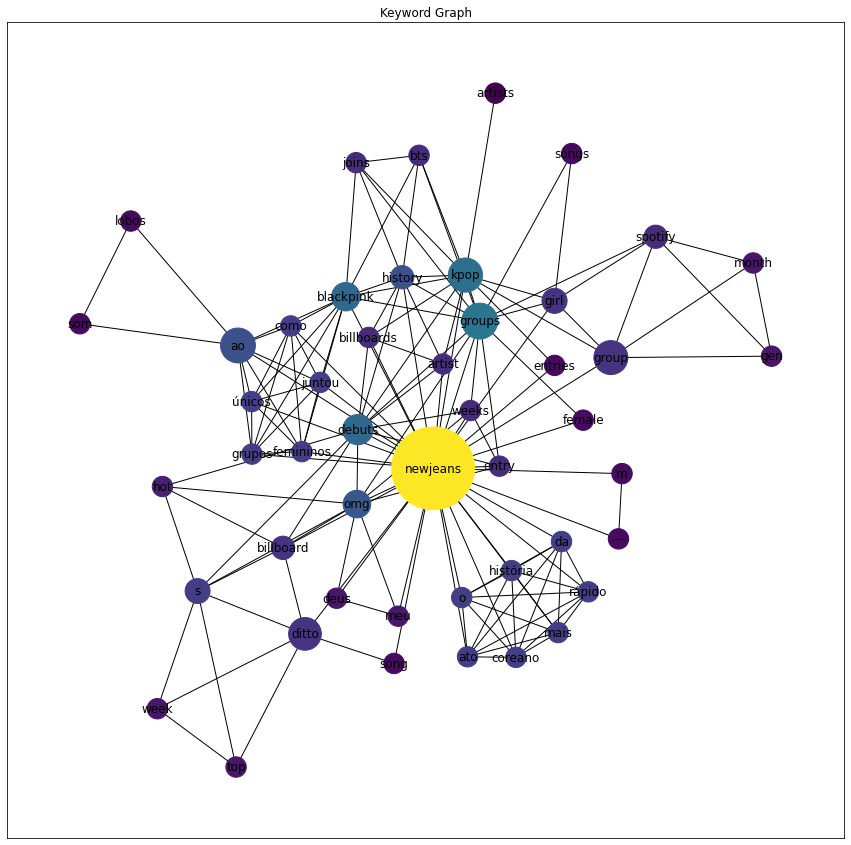

In [79]:
pos = nx.kamada_kawai_layout(G)

betCent = nx.betweenness_centrality(G, normalized = True, endpoints = True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size = [v * 10000 for v in betCent.values()]

plt.figure(figsize = (15, 15))
plt.title("Keyword Graph")
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = node_color, node_size = node_size)

plt.axis('on')